# Hotel Booking

En este notebook básicamente realizo algo de EDA con feature engineering para dejar listo el dataset para el modelo

## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400">Sobre el dataset</p>

>[Fue sacado de este dataset de kaggle](https://www.kaggle.com/datasets/mojtaba142/hotel-booking)

*(Esto lo comencé gracias a un curso de código facilito y me gustó su descripción y diccionario de datos, así que los voy a usar)*<br>
Hotel Facilito se está preparando para las vacaciones de verano, sin embargo, les preocupa que muchos de sus clientes cancelan de ultima hora, dejándoles con habitaciones vacías – sucede que algunos clientes simplemente no se presentan y, a pesar de que a veces se cobra una cuota de reservación, la gran mayoría de las ganancias se obtiene cuando los huéspedes pagan el resto al ocupar la habitación.

Usando sus datos, les gustaría que les ayudaras a identificar a aquellos clientes que tienen más posibilidad de cancelar ya que les gustaría darles seguimiento para que si en caso de que requieran cancelar, se haga con la mayor antelación posible.

 - `hotel`: Hotel en el que se hizo la reserva.
  - `is_canceled`: Indica si la reserva fue cancelada o no.
  - `lead_time`: Número de días que transcurrieron entre la fecha de ingreso de la reserva en el PMS y la fecha de llegada.
  - `arrival_date_year`: Año de la fecha de llegada.
  - `arrival_date_month`: Mes de la fecha de llegada con 12 categorías: "Enero" a "Diciembre".
  - `arrival_date_week_number`: Número de semana de la fecha de llegada.
  - `arrival_date_day_of_month`: Día del mes de la fecha de llegada.
  - `stays_in_weekend_nights`: Número de noches de fin de semana (sábado o domingo) que el huésped se quedó o reservó para quedarse en el hotel.
  - `stays_in_week_nights`: Número de noches de semana (lunes a viernes) que el huésped se quedó o reservó para quedarse en el hotel.
  - `adults`: Número de adultos.
  - `children`: Número de niños.
  - `babies`: Número de bebés.
  - `meal`: Tipo de comida reservada. Valor categórico.
  - `country`: País de origen. Las categorías se representan según ISO 3155–3:2013.
  - `market_segment`: Designación del segmento de mercado.
  - `distribution_channel`: Canal de distribución de la reserva.
  - `is_repeated_guest`: Valor que indica si el nombre de la reserva era de un huésped recurrente (1) o no (0).
  - `previous_cancellations`: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
  - `previous_bookings_not_canceled`: Número de reservas anteriores que no fueron canceladas por el cliente antes de la reserva actual.
  - `reserved_room_type`: Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.
  - `assigned_room_type`: Código del tipo de habitación asignada a la reserva. A veces, el tipo de habitación asignada difiere del tipo de habitación reservada debido a razones operativas del hotel (por ejemplo, sobreventa) o por solicitud del cliente. El código se presenta en lugar de la designación por razones de anonimato.
  - `booking_changes`: Número de cambios/modificaciones realizados a la reserva desde el momento en que se ingresó en el PMS hasta el momento del check-in o la cancelación.
  - `deposit_type`: Indicación de si el cliente hizo un depósito para garantizar la reserva.
  - `agent`: ID de la agencia de viajes que realizó la reserva.
  - `company`: ID de la empresa/entidad que realizó la reserva o es responsable de pagar la reserva.
  - `days_in_waiting_list`: Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.
  - `customer_type`: Tipo de reserva.
  - `adr`: Tarifa diaria promedio.
  - `required_car_parking_spaces`: Número de espacios de estacionamiento requeridos por el cliente.
  - `total_of_special_requests`: Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).
  - `reservation_status`: Último estado de la reserva.
  - `reservation_status_date`: Fecha en que se estableció el último estado.
  - `name`: Nombre del cliente.
  - `email`: Correo electrónico del cliente.
  - `phone`: Teléfono del cliente.
  - `credit_card`: Últimos cuatro dígitos de la tarjeta de crédito del cliente.

## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400"> EDA / Feature Engineering </p>

In [713]:
import pandas as pd

df = pd.read_csv("data/hotel_bookings_training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119190 entries, 0 to 119189
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119190 non-null  object 
 1   is_canceled                     119190 non-null  int64  
 2   lead_time                       119190 non-null  int64  
 3   arrival_date_year               119190 non-null  int64  
 4   arrival_date_month              119190 non-null  object 
 5   arrival_date_week_number        119190 non-null  int64  
 6   arrival_date_day_of_month       119190 non-null  int64  
 7   stays_in_weekend_nights         119190 non-null  int64  
 8   stays_in_week_nights            119190 non-null  int64  
 9   adults                          119190 non-null  int64  
 10  children                        119186 non-null  float64
 11  babies                          119190 non-null  int64  
 12  meal            

Por ahora voy a pasar `reservation_status_date` a formato de fecha

In [714]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format='%Y-%m-%d')

Voy a eliminar los datos personales, que normalmente son innecesarios

In [715]:
df = df.drop(columns=['phone-number','name','email','credit_card'], axis=1)

Con `ydata_profiling` voy a realizar un análisis rapidito para ver por encima los datos

In [716]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Profiling report')
# profile.to_file("df_profiling.html")

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Missing values </p>

In [717]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              487
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16315
company         

Especificamente para `Children` voy a llenarlos con 0

In [718]:
df['children'] = df['children'].fillna(0)

Voy a eliminar las columnas `agent` y `company` que son variables con una cantidad exagerada de valores nulos, además para saber si el cliente va a cancelar o no, no creo que sirva mucho

In [719]:
df = df.drop(columns=['agent','company'],axis=1)

Viendo el análisis de `ydata_profiling` el 0.4% de los datos de country son los faltantes, creo que podemos borrarlos

In [720]:
df = df.dropna(axis=0)

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Duplicated rows </p>

In [721]:
df.duplicated().sum()

# Son demasiadas filas, miré y no son dupliadas del todo así que no voy a eliminarlas
# df = df.drop_duplicates()

31905

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Outliers </p>

In [722]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703.000000,118703
mean,0.371381,104.315443,2016.157485,27.166483,15.802035,0.929008,2.502262,1.858504,0.104125,0.007953,0.032038,0.087226,0.131698,0.221106,2.325746,101.998175,0.061818,0.571738,2016-07-30 05:58:51.034598912
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483176,106.911664,0.707529,13.590306,8.781496,0.996222,1.900153,0.578706,0.398974,0.097417,0.176102,0.846527,1.485163,0.652350,17.602227,50.488349,0.244023,0.792752,NaN


<Axes: xlabel='adr'>

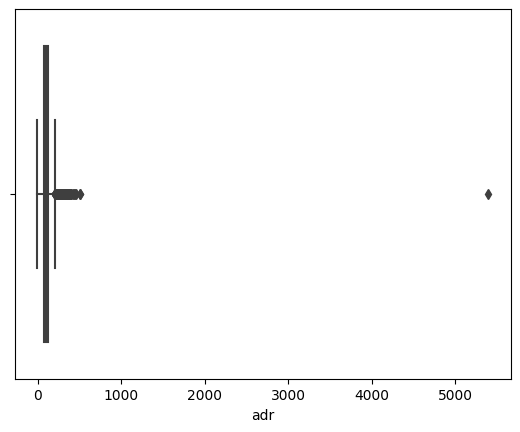

In [723]:
import seaborn as sns

sns.boxplot(x=df['adr'])

Un solo dato no afecta mucho, por lo mismo lo eliminaré

In [724]:
df = df[(df['adr']>=0) & (df['adr']<1000)]

<Axes: xlabel='adr'>

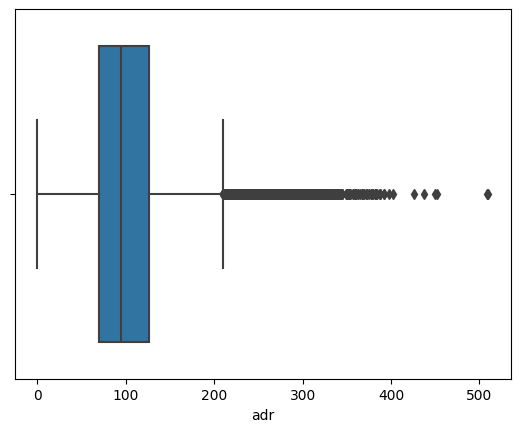

In [725]:
sns.boxplot(x=df['adr'])

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Encoding </p>

> Acá voy a copiar los datos para realizar modificaciones a uno mientras el original termino de limpiarlo dependiendo del resultado de las modificaciones del otro, mas adelante se entiende mejor

In [726]:
data = df.copy()

data_cat = data.select_dtypes(include=['object']).columns
data_cat

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [727]:
for _ in data_cat:
    print('=='*10)
    print(data[_].value_counts())

hotel
City Hotel      79175
Resort Hotel    39526
Name: count, dtype: int64
arrival_date_month
August       13835
July         12609
May          11752
October      11079
April        11027
June         10907
September    10454
March         9718
February      8000
November      6733
December      6718
January       5869
Name: count, dtype: int64
meal
BB           91716
HB           14405
SC           10619
Undefined     1165
FB             796
Name: count, dtype: int64
country
PRT    48510
GBR    12112
FRA    10400
ESP     8549
DEU     7273
       ...  
SLE        1
FJI        1
BDI        1
AIA        1
MRT        1
Name: count, Length: 177, dtype: int64
market_segment
Online TA        56318
Offline TA/TO    24110
Groups           19771
Direct           12425
Corporate         5108
Complementary      732
Aviation           235
Undefined            2
Name: count, dtype: int64
distribution_channel
TA/TO        97566
Direct       14453
Corporate     6484
GDS            193
Undefined    

> Me quedé con la duda, no sé como realizar lo de abajo con un pipeline, o columnTransformer en caso de necesitarlo en el futuro, afortunadamente no lo voy a necesitar porque es una variable que borraré

In [728]:
# Convierto esta a numerico
data['reservation_status'] = data['reservation_status'].apply(lambda x: 1 if x == 'Check-Out' else 0)

In [729]:
encoder = pd.get_dummies(data[['hotel','meal','distribution_channel','reserved_room_type','assigned_room_type','customer_type','deposit_type','arrival_date_month']])*1
data = pd.concat([data, encoder], axis=1)
# Acá también elimino country y market_segment
data = data.drop(columns=['country','market_segment','hotel','meal','distribution_channel','reserved_room_type','assigned_room_type','customer_type','deposit_type','arrival_date_month'], axis=1)

> eliminé `market_segment` porque tendia a correlacionarse con `distribution_channel`<br> También elminé `country` por tener muchos datos y no puedo hacerle encoding

Puedo obervar las correlaciones, si quiero ver a detalle una puedo utilizar
`data['is_canceled'].corr(data['reservation_status'])`

In [730]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 20))
# sns.heatmap(data.corr(), annot=False,  cmap='coolwarm', fmt='.2f',linecolor='black',linewidths=0.01)

Vemos que hay unas variables altamente relacionadas aparte de las del encoding, procedemos a eliminarlas.<br>
*también las eliminamos del dataset original que usaremos para el pipeline*

In [731]:
# Dataset original
df = df.drop(['reservation_status','reservation_status_date'],axis=1)

# Dataset de prueba (el que ando modificando antes de usar pipelines)
data = data.drop(['reservation_status','reservation_status_date'],axis=1)

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Binarizer </p>

In [732]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()

Un ejemplo de este uso seria en `total_of_special_requests`, esta columna nos dice cuantas peticiones especiales hizo el cliente, por ejemplo, si pidió almohadas, que oliera a x cosa, etc.

Como solo queremos saber si hizo o no peticiones podemos usar `Binarizer` con el fin de unicamente saber si hizo o no, peticiones

In [733]:
data['previous_cancellations'] = binarizer.fit_transform(data[['previous_cancellations']])
data['previous_bookings_not_canceled'] = binarizer.fit_transform(data[['previous_bookings_not_canceled']])
data['booking_changes'] = binarizer.fit_transform(data[['booking_changes']])
data['required_car_parking_spaces'] = binarizer.fit_transform(data[['required_car_parking_spaces']])
data['total_of_special_requests'] = binarizer.fit_transform(data[['total_of_special_requests']])

# encoder = pd.get_dummies(data[['previous_cancellations','previous_bookings_not_canceled','booking_changes','required_car_parking_spaces','total_of_special_requests']])*1
# data = pd.concat([data, encoder], axis=1)
# data = data.drop(columns=['previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests'], axis=1)

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Train test split </p>

In [734]:
X = data.drop(['is_canceled'], axis=1)
y = data['is_canceled']

Para no complicarme, solo asigno el 0.6 a training y el resto a test y val, o sea 0.2 y 0.2

In [735]:
original_count = len(data)
training_size = 0.6
test_size = (1-training_size)/2

training_count = int(original_count * training_size)
test_count = int(original_count * test_size)
validation_count = int(original_count -training_count-test_count)

print(training_count, test_count, validation_count, original_count)

71220 23740 23741 118701


In [736]:
from sklearn.model_selection import train_test_split

# rest es el resto
train_x, rest_x, train_y, rest_y = train_test_split(X,y, train_size=training_count, random_state=42)
test_x, validate_x, test_y, validate_y = train_test_split(rest_x, rest_y, test_size=test_count, random_state=42, stratify=rest_y)

print(len(train_x), len(test_x), len(validate_x))

71220 23741 23740


### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Feature scaling </p>

Viendo bien el dataset la unica posible escalda seria para `adr`

In [737]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(train_x[['adr']])

train_x['adr'] = scaler.transform(train_x[['adr']])
validate_x['adr'] = scaler.transform(validate_x[['adr']])

## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400"> Machine learning </p>

### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Model </p>

Voy a utilizar optuna para los hiperparámetros de RandomForest

In [738]:
import optuna
from sklearn.ensemble import RandomForestClassifier

study = optuna.create_study(direction="maximize")

def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 10)
    n_stimators = trial.suggest_int("n_estimators", 10, 100)
    
    model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, n_estimators=n_stimators,random_state=10)
    
    model.fit(train_x, train_y)
    
    return model.score(validate_x, validate_y)

# study.optimize(objective, n_trials=100)
# print(f'Best parameters: {study.best_params}')
# print(f'Best score: {study.best_value}')

[I 2024-03-25 00:48:20,025] A new study created in memory with name: no-name-1afc08fb-089d-4f70-b44f-7945d218f068


Los "probamos" y vemos que está suave

In [739]:
from sklearn.metrics import accuracy_score, recall_score

rfc = RandomForestClassifier(n_estimators=87,random_state=10, criterion='gini',max_depth=10)
rfc.fit(train_x, train_y)

pred_y = rfc.predict(validate_x)
print(rfc.score(train_x,train_y),accuracy_score(validate_y, pred_y), recall_score(validate_y, pred_y))

0.8072311148553777 0.8029907329401853 0.5162282200204988


### <p style="color: #FFFFFF;background: #006B8380; text-align: center; padding:5px 0; font-weight: 400"> Model testing </p>

Ahora una prueba más seria seria hacerlo con los datos de test, datos que no hemos tocado, para esto unimos los de entrenamiento (train y validate) y predecimos las de test

In [740]:
data_train_x = pd.concat([train_x, validate_x])
data_train_y = pd.concat([train_y, validate_y])

In [741]:
rfc = RandomForestClassifier(n_estimators=59,random_state=10, criterion='gini',max_depth=10)
rfc.fit(data_train_x, data_train_y)

RandomForestClassifier(max_depth=10, n_estimators=59, random_state=10)

In [742]:
from sklearn.metrics import accuracy_score, recall_score

test_pred_y = rfc.predict(test_x)
print(accuracy_score(test_pred_y, test_y), recall_score(test_pred_y, test_y))

0.7931847858135714 0.9143835616438356


## <p style="color: #FFFFFF;background: #007E4A80; text-align: center; padding:5px 0; font-weight: 400"> Conclusión </p>

Guardaré el <code>df</code> original, puesto que vemos que el modelo termina "bien", en lo que conozco un 80% de accuracy, con 90% de recall estaria "bien", no sé si esté sobre-ajustado, más adelante cuando aprenda técnicas de sobreajustado y tenga más experiencia lo revisaré mejor.


In [743]:
ruta = 'data/hotel_booking_clean.csv'
df.to_csv(ruta)

### Ahora solo escribo las columnas que voy a usar en mi pipeline

- Variables para el encoding<br>
`['hotel','meal','distribution_channel','reserved_room_type','assigned_room_type','customer_type','deposit_type','arrival_date_month']`<br>

- Variables para el binarizer<br>
`['previous_cancellations','previous_bookings_not_canceled','booking_changes','required_car_parking_spaces','total_of_special_requests']`<br>

- Variables a escalar<br>
`['adr']`<br>

In [744]:
# lo que hago es agarrar el dataframe original, eliminar las variables de arriba, las extra que eliminé en el encoding (market_segment y country), y por supuesto eliminar el target (is_canceled)

cols = ['is_canceled','market_segment','country','hotel','meal','distribution_channel','reserved_room_type','assigned_room_type','customer_type','deposit_type','arrival_date_month','previous_cancellations','previous_bookings_not_canceled','booking_changes','required_car_parking_spaces','total_of_special_requests','adr']

passthrough_cols = df.drop(columns=cols, axis=1).columns
passthrough_cols

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'days_in_waiting_list'],
      dtype='object')

- Variables para el passthrough<br>
`['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'days_in_waiting_list']`

- Mejor configuración del modelo de random forest classifier<br>
`RandomForestClassifier(n_estimators=59,random_state=10, criterion='gini',max_depth=10)`